# Kmeans Madrid

### Librerias

In [329]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import re

### Dataset

In [330]:
df = pd.read_csv('/Users/egmzvalerio/apps/iteso-data-analytics/data/raw/Madrid_listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.0,5,106,2023-10-16,0.63,1,22,4,NaN
1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Dana,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.0,5,172,2022-09-26,1.05,3,0,0,NaN
2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,33,2018-07-15,0.30,2,135,0,NaN
3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.0,5,33,2023-11-06,0.30,1,168,8,NaN
4,30959,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,132883,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,8,2017-05-30,0.08,1,0,0,NaN


### Eliminación de columnas inservibales

In [331]:
df = df.drop(['host_id', 'host_name', 'last_review', 'license', 'longitude', 'latitude', 'id'], axis = 1)
df.head()

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,Chamartín,Hispanoamérica,Private room,85.0,5,106,0.63,1,22,4
1,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,Centro,Sol,Entire home/apt,65.0,5,172,1.05,3,0,0
2,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,Latina,Cármenes,Private room,31.0,4,33,0.30,2,135,0
3,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,Centro,Universidad,Entire home/apt,94.0,5,33,0.30,1,168,8
4,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,Centro,Embajadores,Entire home/apt,NaN,3,8,0.08,1,0,0


### Reemplazo de valores faltantes en el precio

In [332]:
df.isna().sum()

name                                 0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                             3809
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5367
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

<Axes: >

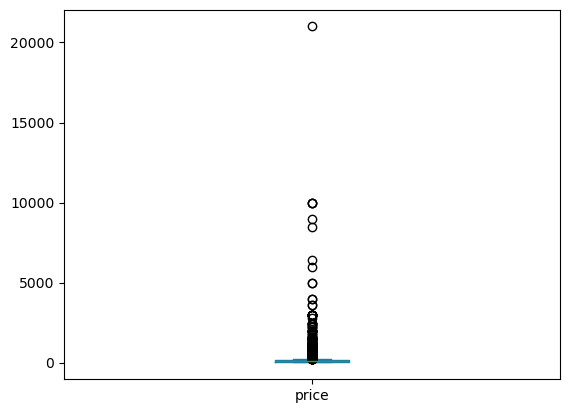

In [333]:
df['price'].plot(kind = 'box', )

In [334]:
df['price'].max()

21000.0

In [335]:
media_precio = df['price'].mean()
print('La media del precio', media_precio)

df['price'].fillna(media_precio, inplace = True)

La media del precio 129.01605778963835


### Comprobar que no haya valores faltantes

In [336]:
df.isna().sum()

name                                 0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5367
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [337]:
Le = LabelEncoder()

### Creación de nuevas variables

In [338]:
df[['type_property', 'stars', 'bedrooms', 'beds', 'baths']] = df['name'].str.split(' · ', expand = True)
df.head()

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,type_property,stars,bedrooms,beds,baths
0,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,Chamartín,Hispanoamérica,Private room,85.000000,5,106,0.63,1,22,4,Rental unit in Madrid,★4.88,1 bedroom,1 bed,1 private bath
1,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,Centro,Sol,Entire home/apt,65.000000,5,172,1.05,3,0,0,Rental unit in Madrid,★4.63,1 bedroom,2 beds,1 bath
2,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,Latina,Cármenes,Private room,31.000000,4,33,0.30,2,135,0,Rental unit in Madrid,★4.58,1 bedroom,1 bed,1 bath
3,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,Centro,Universidad,Entire home/apt,94.000000,5,33,0.30,1,168,8,Rental unit in Madrid,★4.91,6 bedrooms,1 bed,1 bath
4,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,Centro,Embajadores,Entire home/apt,129.016058,3,8,0.08,1,0,0,Loft in Madrid,★4.38,1 bedroom,1 bed,1 bath


### Tipo de propiedad

In [339]:
df['type_property'] = df['type_property'].str.replace(r"[\[\]\'\,\']", "", regex = True)
df['type_property'] = df['type_property'].str.lower().str.split().str[0]
df['type_property'] 

0        rental
1        rental
2        rental
3        rental
4          loft
          ...  
25538    rental
25539    rental
25540    rental
25541    rental
25542    rental
Name: type_property, Length: 25543, dtype: object

### Rating

In [340]:
df['stars'] = df['stars'].str.replace('★', '')
df['stars']

0        4.88
1        4.63
2        4.58
3        4.91
4        4.38
         ... 
25538     New
25539     New
25540     New
25541     New
25542     New
Name: stars, Length: 25543, dtype: object

### Cantidad de baños

In [341]:
df['bedrooms'] = df['bedrooms'].astype(str).str[0]
df['bedrooms'] 

0        1
1        1
2        1
3        6
4        1
        ..
25538    2
25539    1
25540    1
25541    2
25542    1
Name: bedrooms, Length: 25543, dtype: object

### Cantidad de camas

In [342]:
df['beds'] = df['beds'].astype(str).str[0]
df['beds'] 

0        1
1        2
2        1
3        1
4        1
        ..
25538    3
25539    1
25540    1
25541    4
25542    3
Name: beds, Length: 25543, dtype: object

### Cantidad de duchas

In [343]:
df['baths'] = df['baths'].astype(str).str[0]
df['baths'] 

0        1
1        1
2        1
3        1
4        1
        ..
25538    1
25539    1
25540    1
25541    1
25542    1
Name: baths, Length: 25543, dtype: object

In [344]:
df = df.drop('name', axis = 1)

### Valores faltantes de nuevas variables

<Axes: >

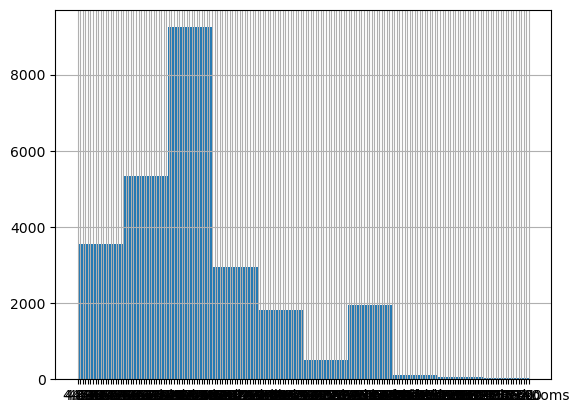

In [345]:
df['stars'].hist()

<Axes: >

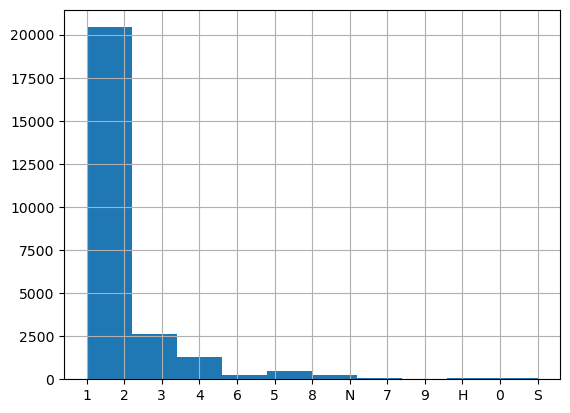

In [346]:
df['beds'].hist()

<Axes: >

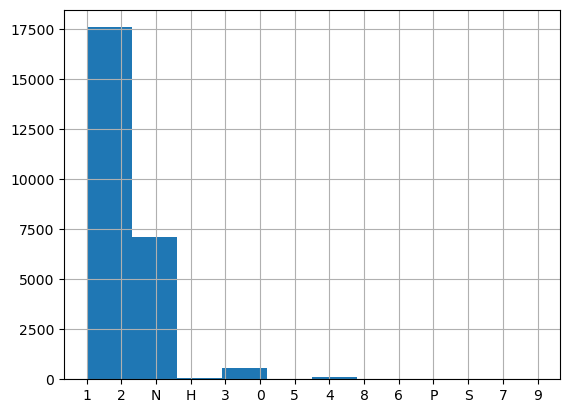

In [347]:
df['baths'].hist()

<Axes: >

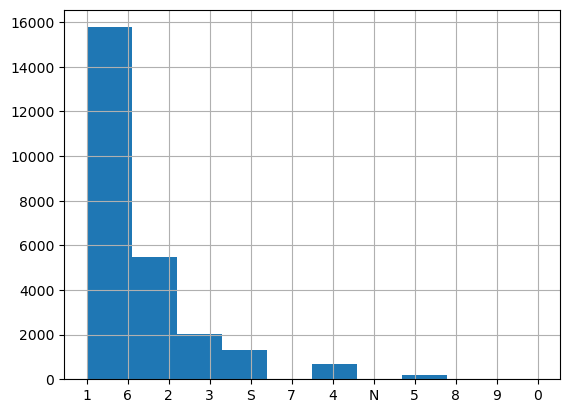

In [348]:
df['bedrooms'].hist()

### Disponibilidad en meses

In [349]:
df["availability_365"] = df["availability_365"].apply(lambda x: round(x/30))
df["availability_365"]

0         1
1         0
2         4
3         6
4         0
         ..
25538    10
25539     6
25540    11
25541    11
25542    10
Name: availability_365, Length: 25543, dtype: int64

### Variable neigbourhood a variable categórica

In [350]:
Le.fit(df["neighbourhood"])
df["neighbourhood"] = Le.transform(df[["neighbourhood"]])
df["neighbourhood"]

/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0         58
1        111
2         43
3        114
4         49
        ... 
25538    124
25539     56
25540     31
25541     13
25542     62
Name: neighbourhood, Length: 25543, dtype: int64

In [351]:
Le.fit(df["neighbourhood_group"])
df["neighbourhood_group"] = Le.transform(df[["neighbourhood_group"]])
df["neighbourhood_group"]

/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0         4
1         3
2         9
3         3
4         3
         ..
25538    17
25539    14
25540    16
25541     5
25542     3
Name: neighbourhood_group, Length: 25543, dtype: int64

### Clasificación de reviews_ltm cada 10 reviews

<Axes: >

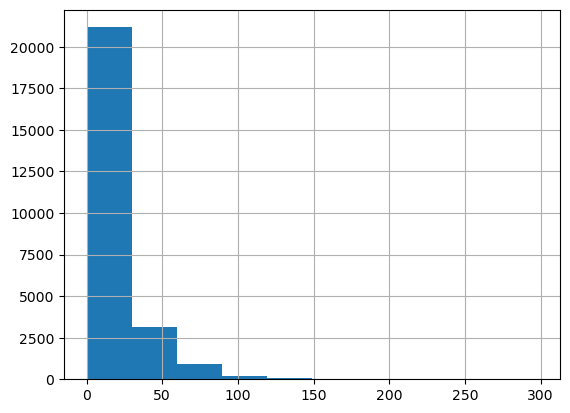

In [352]:
df["number_of_reviews_ltm"].hist()

In [353]:
def resenas(x):
    if x <= 10:
        X = 0
    elif x <= 20:
        X = 1
    elif x <= 30:
        X = 2
    elif x <= 40:
        X = 3
    elif x <= 50:
        X = 4
    elif x <= 60:
        X = 5
    elif x <= 70:
        X = 6
    elif x <= 80:
        X = 7
    elif x <= 90:
        X = 8
    else:
        X = 9
    return X

In [354]:
df["number_of_reviews_ltm"] = df["number_of_reviews_ltm"].apply(lambda x: resenas(x))
df["number_of_reviews_ltm"]

0        0
1        0
2        0
3        0
4        0
        ..
25538    0
25539    0
25540    0
25541    0
25542    0
Name: number_of_reviews_ltm, Length: 25543, dtype: int64

### Clasificación de anfitriones 

<Axes: >

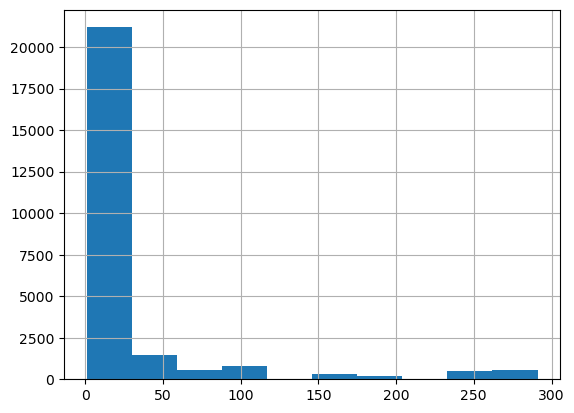

In [355]:
df["calculated_host_listings_count"].hist()

In [356]:
def anfitriones(x):
    if x <= 10:
        X = 0
    elif x <= 20:
        X = 1
    elif x <= 30:
        X = 2
    elif x <= 40:
        X = 3
    elif x <= 50:
        X = 4
    elif x <= 100:
        X = 5
    else:
        X = 6
    return X

In [357]:
df["calculated_host_listings_count"] = df["calculated_host_listings_count"].apply(lambda x: anfitriones(x))
df["calculated_host_listings_count"]

0        0
1        0
2        0
3        0
4        0
        ..
25538    5
25539    5
25540    4
25541    6
25542    5
Name: calculated_host_listings_count, Length: 25543, dtype: int64

### Clasificación de reseña por mes

<Axes: >

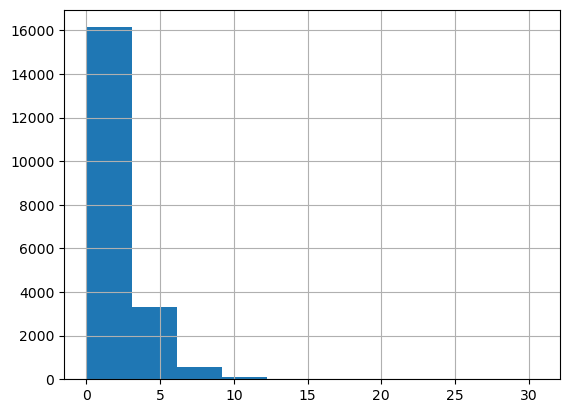

In [358]:
df["reviews_per_month"].hist()

In [359]:
def resenas_mes(x):
    if x <= 2:
        X = 1
    elif x <= 4:
        X = 2
    elif x <= 6:
        X = 3
    elif x <= 8:
        X = 4
    elif x <= 10:
        X = 5
    else:
        X = 6
    return X

In [360]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df["reviews_per_month"] = df["reviews_per_month"].apply(lambda x: resenas_mes(x))
df["reviews_per_month"]

0        1
1        1
2        1
3        1
4        1
        ..
25538    1
25539    1
25540    1
25541    1
25542    1
Name: reviews_per_month, Length: 25543, dtype: int64

### Clasificación de cantidad de reseñas

<Axes: >

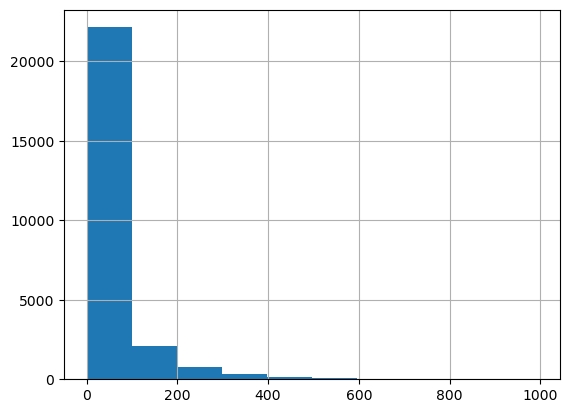

In [361]:
df["number_of_reviews"].hist()

In [362]:
def resenas_cuan(x):
    if x <= 25:
        X = 0
    if x <= 50:
        X = 1
    elif x <= 100:
        X = 2
    elif x <= 150:
        X = 3
    elif x <= 200:
        X = 4
    else:
        X = 5
    return X

In [363]:
df["number_of_reviews"] = df["number_of_reviews"].apply(lambda x: resenas_cuan(x))
df["number_of_reviews"]

0        3
1        4
2        1
3        1
4        1
        ..
25538    1
25539    1
25540    1
25541    1
25542    1
Name: number_of_reviews, Length: 25543, dtype: int64

### Cambio a variable categorica el tipo de cuarto

In [364]:
Le.fit(df["room_type"])
df["room_type"] = Le.transform(df[["room_type"]])
df["room_type"]

/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0        2
1        0
2        2
3        0
4        0
        ..
25538    0
25539    0
25540    0
25541    0
25542    0
Name: room_type, Length: 25543, dtype: int64

### Cambio a variable categorica el tipo de propiedad

In [365]:
Le.fit(df["type_property"])
df["type_property"] = Le.transform(df[["type_property"]])
df["type_property"]


/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0        26
1        26
2        26
3        26
4        21
         ..
25538    26
25539    26
25540    26
25541    26
25542    26
Name: type_property, Length: 25543, dtype: int64

### Columnas no numéricas

In [366]:
columnas_no_numericas = df.select_dtypes(exclude=[np.number]).columns
columnas_no_numericas

Index(['stars', 'bedrooms', 'beds', 'baths'], dtype='object')

In [367]:
df = df.apply(pd.to_numeric, errors='coerce')

### Kmeans 

In [368]:
df['beds'].fillna(0, inplace = True)
df['stars'].fillna(0, inplace = True)
df['baths'].fillna(0, inplace = True)
df['bedrooms'].fillna(0, inplace = True)
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
type_property                     0
stars                             0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [369]:
X = df.values

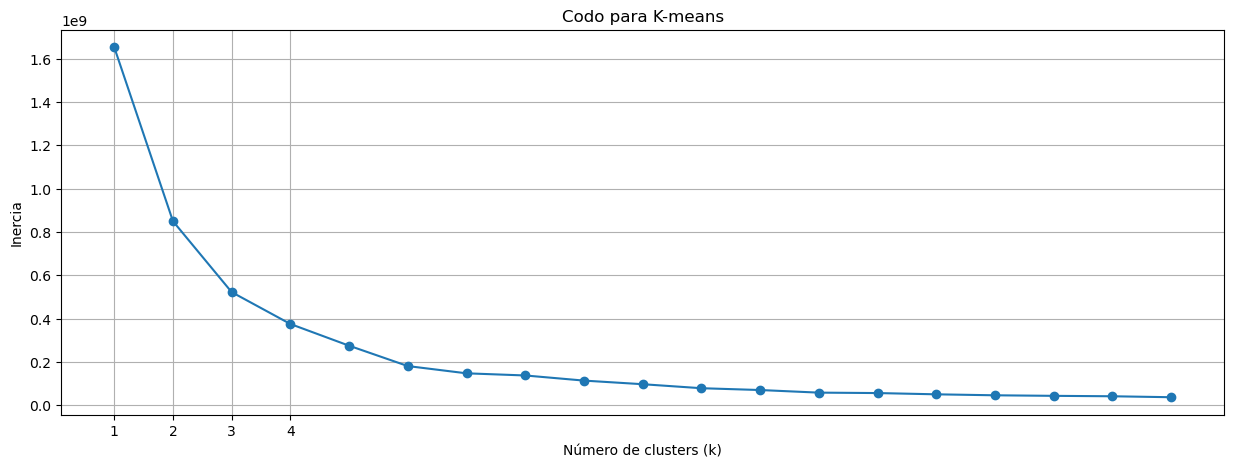

In [370]:
lista = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 15)
    kmeans.fit(X)
    lista.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1,20), lista, marker = "o")
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Codo para K-means')
plt.xticks(np.arange(1, 5, 1))
plt.grid()

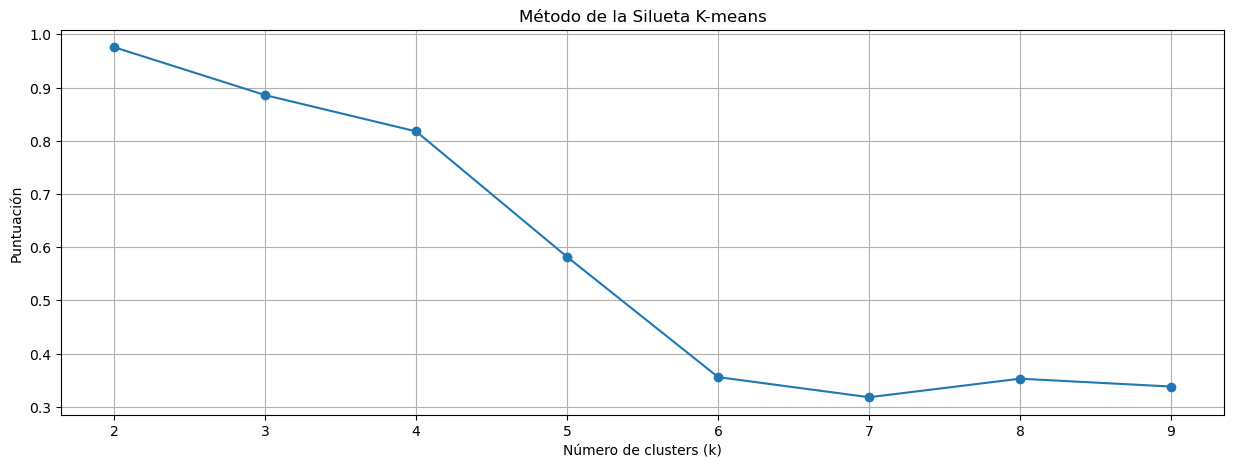

In [371]:
resultados = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 20)
    cluster_labels = kmeans.fit_predict(X)
    promedio = silhouette_score(X, cluster_labels)
    resultados.append(promedio)

optimal_k = k_range[np.argmax(resultados)]

plt.figure(figsize=(15, 5))
plt.plot(k_range, resultados, marker = 'o')
plt.title('Método de la Silueta K-means')
plt.ylabel('Puntuación')
plt.xlabel('Número de clusters (k)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [372]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 24)
clusters = kmeans.fit_predict(df)
df["cluster"] = clusters

In [373]:
clusters = df.groupby("cluster").mean()
clusters

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,type_property,stars,bedrooms,beds,baths
cluster,,,,,,,,,,,,,,,
0,6.607724,69.348523,0.732719,106.254400,7.623561,1.504545,1.419868,1.012726,4.933341,1.054862,24.154971,3.155874,1.425484,1.762372,0.896255
1,11.500000,55.000000,0.333333,11411.000000,57.333333,1.000000,1.000000,0.000000,10.500000,0.000000,22.833333,0.625000,2.500000,1.333333,0.166667
2,7.569705,69.571046,0.733244,647.072386,11.189008,1.222520,1.084450,0.764075,5.332440,0.313673,23.164879,1.724370,2.583110,2.336461,0.973190
3,6.868421,70.500000,0.631579,3004.210526,2.000000,1.052632,1.026316,0.184211,5.368421,0.052632,23.421053,0.829474,2.473684,1.684211,0.473684


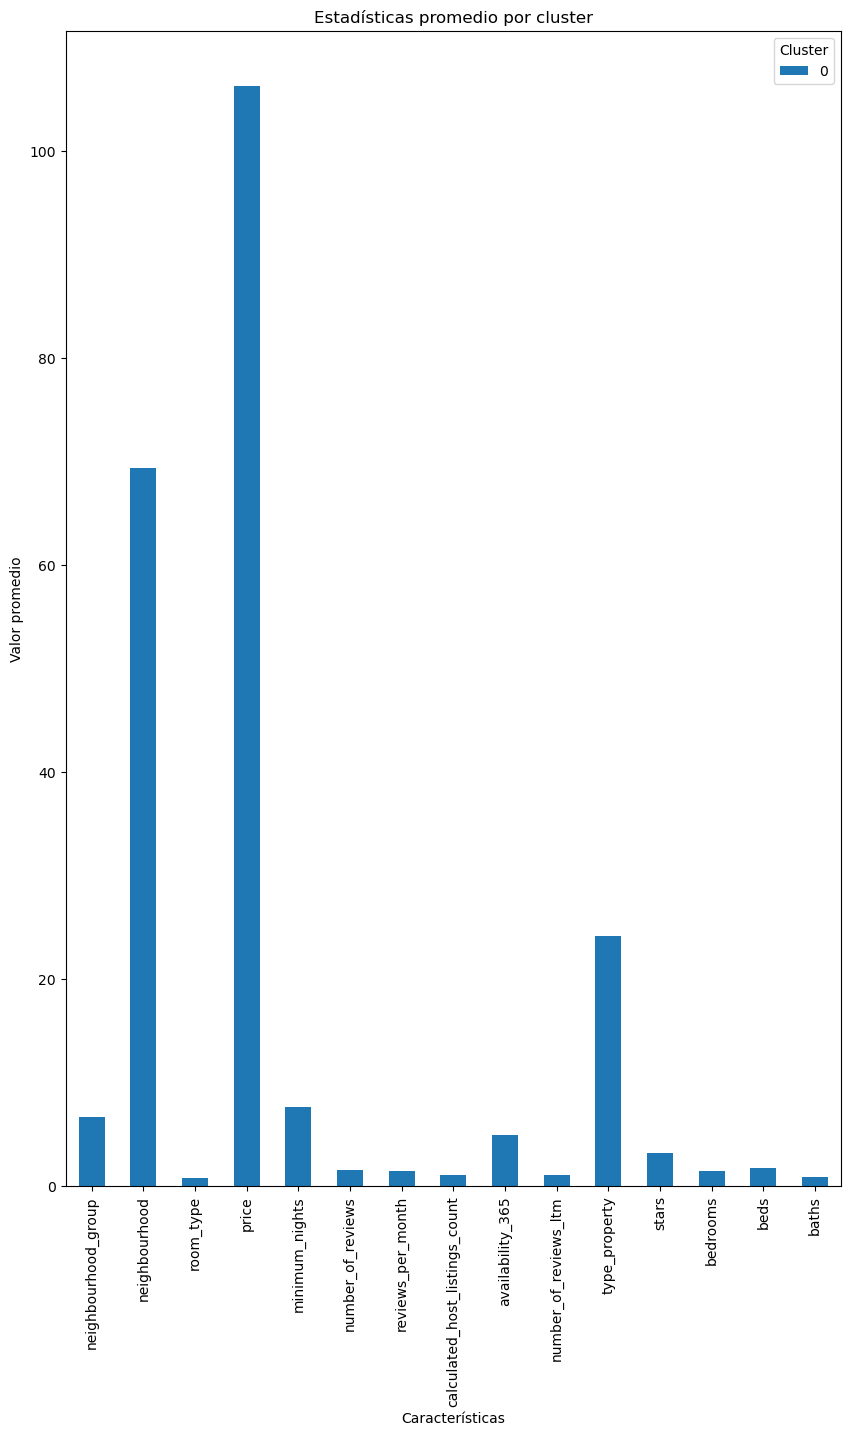

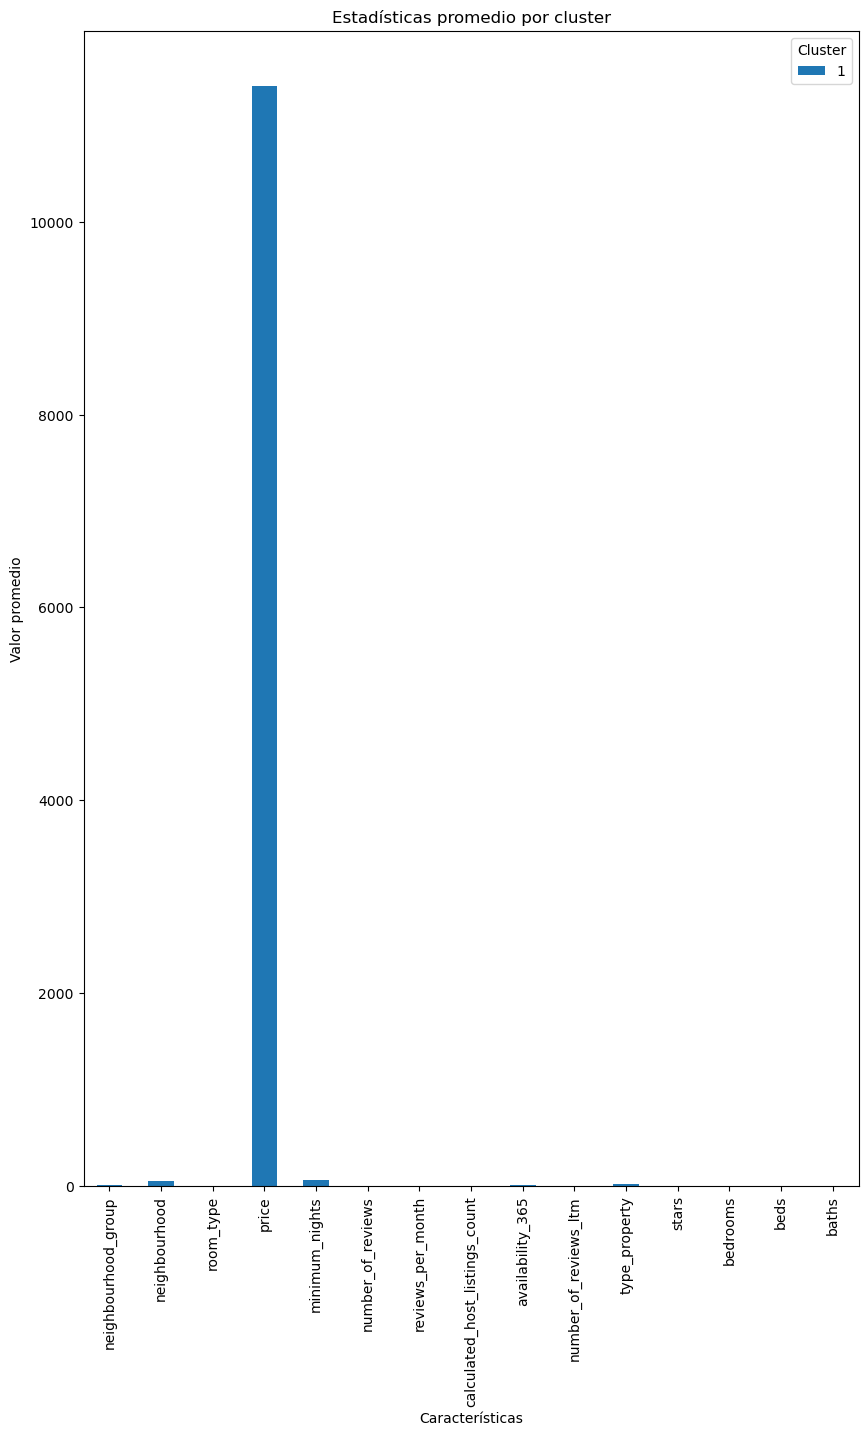

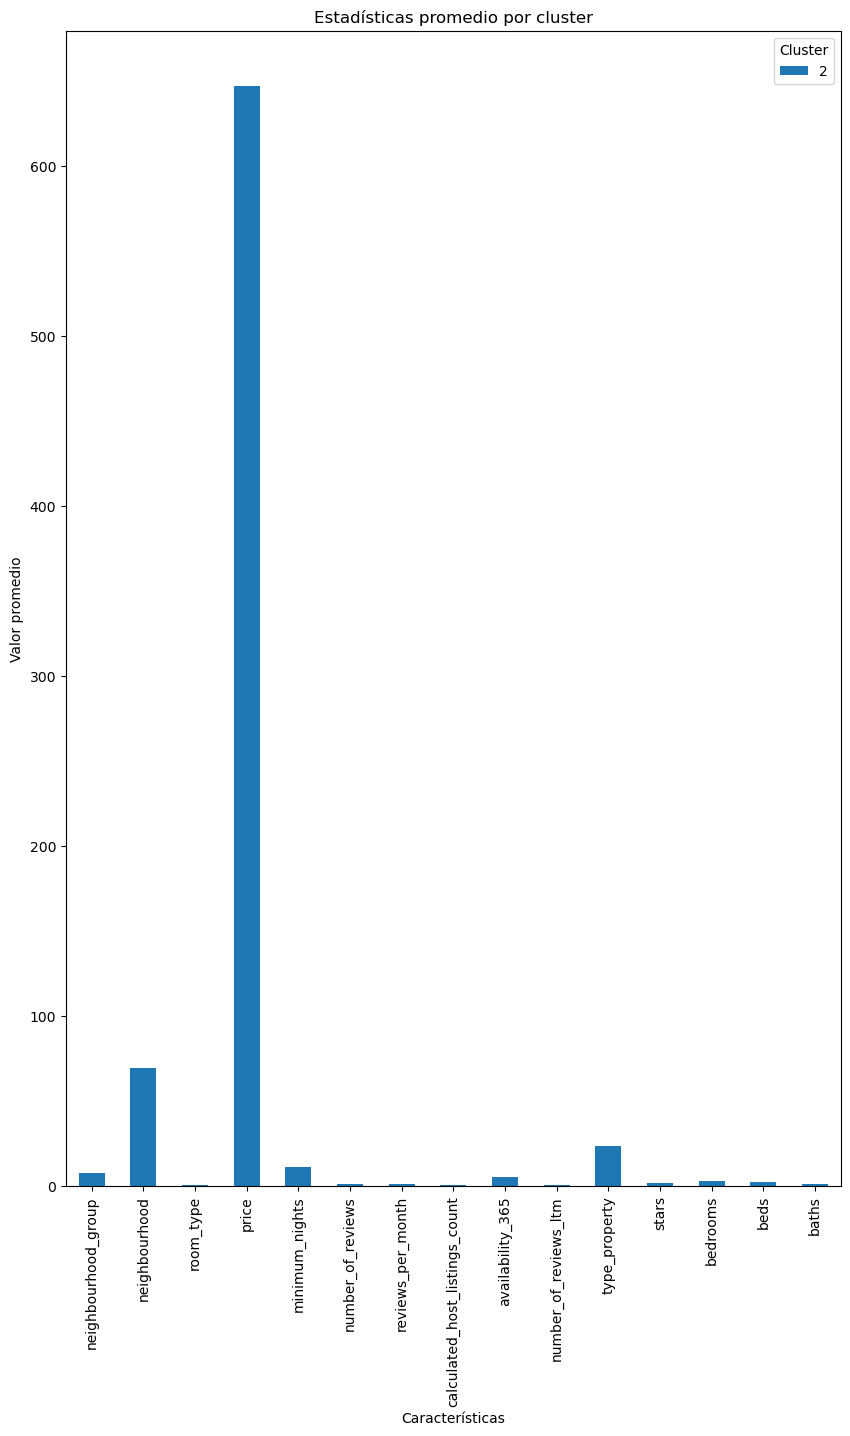

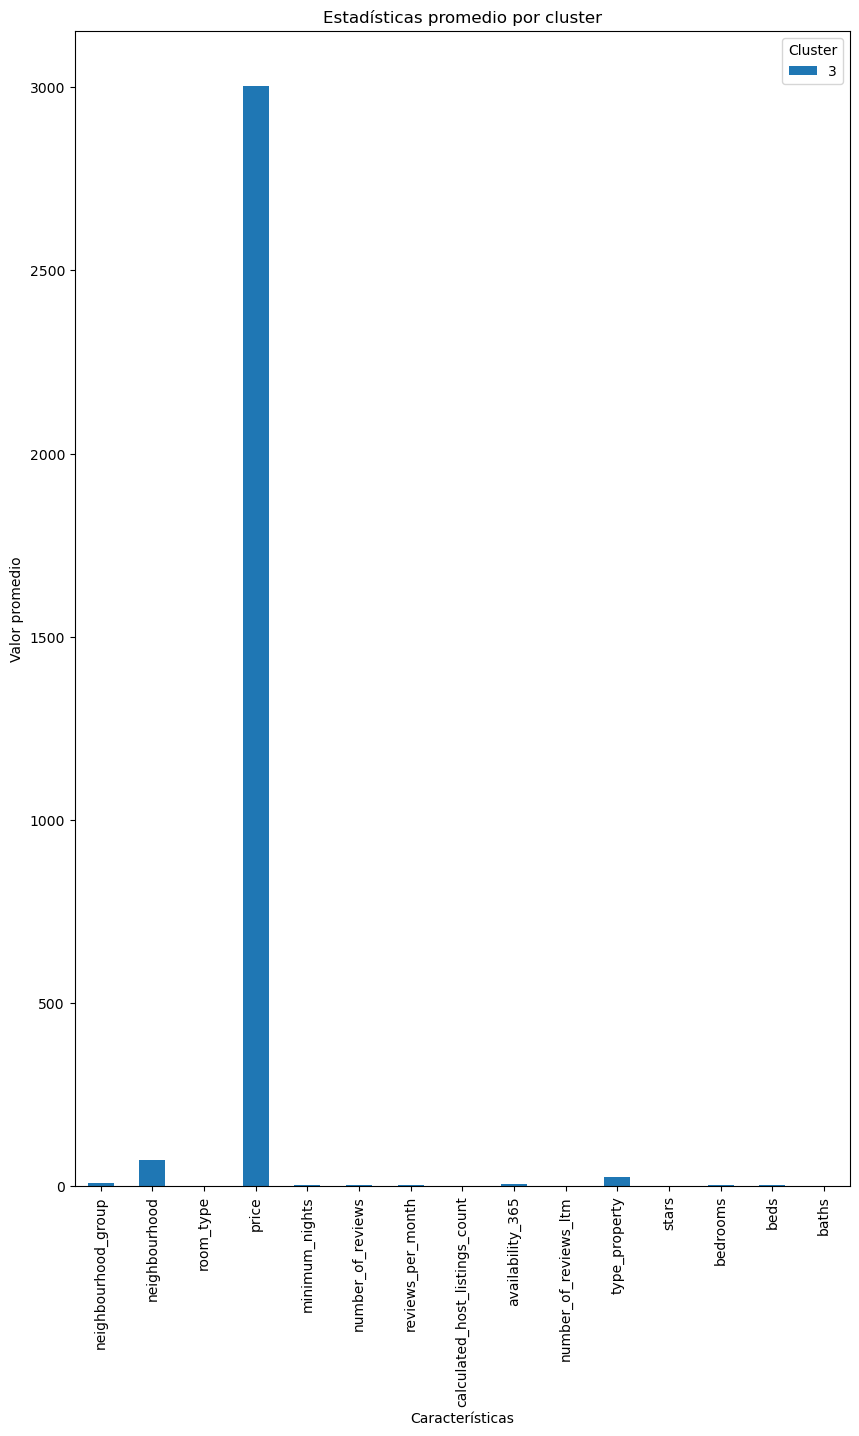

KeyError: 4

In [374]:
for x in list(range(0,5)):
    clusters.loc[x].plot(kind = "bar", figsize=(10,15))
    plt.xlabel('Características')
    plt.ylabel('Valor promedio')
    plt.title('Estadísticas promedio por cluster')
    plt.legend(title = 'Cluster')
    plt.show()

- En madrid las mayorias de las casas y hospedajes son muy costosos, los hospedajes con mayor calificación de estrellas, son los que poseen mayor cantidad de baños, cuartos y camas, asi como el mínimo de noches que es más alto que los demás, las demás viviendas aparte de ser costosas, tienen menos baños, cuartos y camas y por lo tanto menor rating y menos noches mínimas.

In [375]:
dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan.fit(X)

etiquetas = dbscan.labels_
num_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)
num_ruido = list(etiquetas).count(-1)

# Imprimir los resultados
print("Número de clusters:", num_clusters)
print("Número de puntos clasificados como ruido:", num_ruido)

Número de clusters: 84
Número de puntos clasificados como ruido: 24875
